importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 1) Loading the CSV data file into a pandas dataframe

In [2]:
df = pd.read_csv("C:\\Users\\naresh\\OneDrive\\Desktop\\EDA\\CARS\\Data set\\CARS.csv")

In [10]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


Determining instances and the number of features.

In [11]:
df.shape

(428, 15)

Removing irrelevant features.

In [13]:
# Removing irrelevant features
df = df.drop(['Model','DriveTrain','Invoice', 'Origin', 'Type'], axis=1)
df.head(5)

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,"$43,755",3.5,6.0,225,18,24,3880,115,197


# 3) Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   MSRP         428 non-null    object 
 2   EngineSize   428 non-null    float64
 3   Cylinders    426 non-null    float64
 4   Horsepower   428 non-null    int64  
 5   MPG_City     428 non-null    int64  
 6   MPG_Highway  428 non-null    int64  
 7   Weight       428 non-null    int64  
 8   Wheelbase    428 non-null    int64  
 9   Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 33.6+ KB


In [18]:
df.ndim

2

In [19]:
df.shape

(428, 10)

In [20]:
df = df.drop_duplicates(subset='MSRP', keep='first')
df.count()

Make           410
MSRP           410
EngineSize     410
Cylinders      408
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         410
Wheelbase      410
Length         410
dtype: int64

In [21]:
print(df.isnull().sum())

Make           0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [22]:
df['Cylinders'].fillna(df['Cylinders'].mean(),inplace=True)

In [23]:
print(df.isnull().sum())

Make           0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [24]:
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]

In [25]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

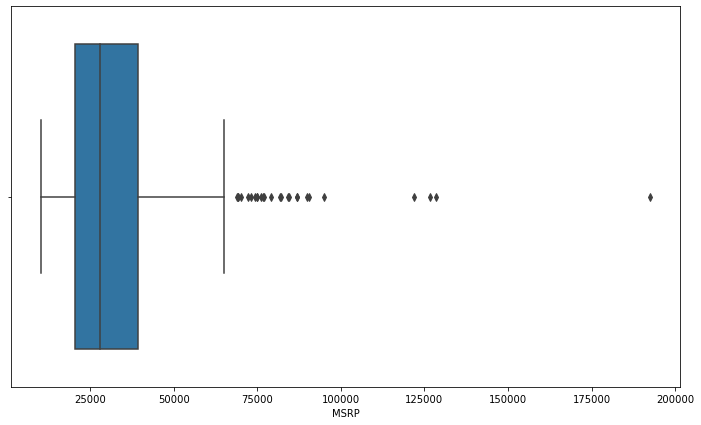

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['MSRP'])
plt.show()

In [27]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,32919.021951,3.200976,5.823529,216.007317,20.039024,26.792683,3581.221951,108.168293,186.368293
std,19628.241002,1.115264,1.556824,72.330689,5.280720,5.790004,766.396651,8.365634,14.416388
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,2.325000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,178.000000
50%,27807.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39411.250000,3.875000,6.000000,250.000000,21.000000,29.000000,3974.250000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


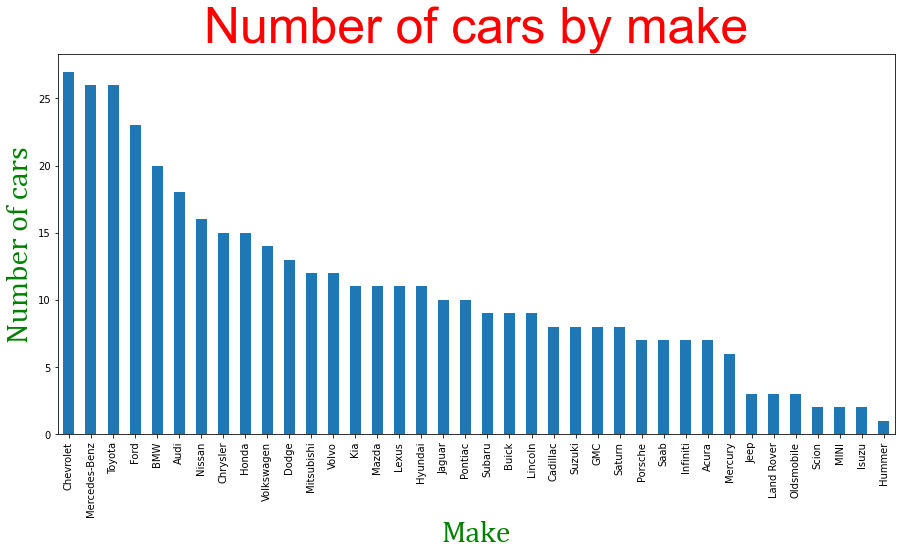

In [28]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(15,7))
f={'family':'Arial','size':50,"color":'r'}
v={'family':'cambria','size':30,"color":'g'}
plt.title("Number of cars by make",fontdict=f)
plt.ylabel('Number of cars',fontdict=v)
plt.xlabel('Make',fontdict=v);

Text(0.5, 41.09375, 'HeatMap')

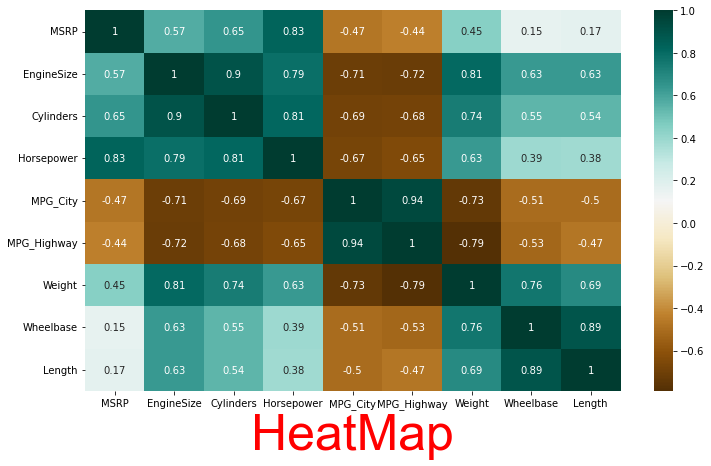

In [29]:
plt.figure(figsize=(12,7))

c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.xlabel("HeatMap",fontdict=f)

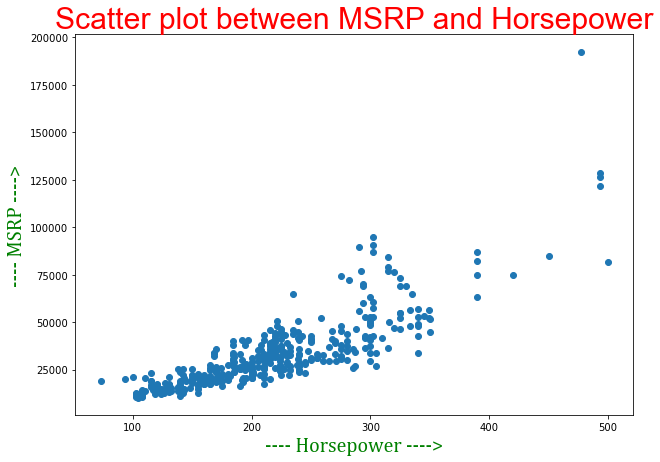

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(df['Horsepower'], df['MSRP'])
f={'family':'Arial','size':30,"color":'r'}
v={'family':'cambria','size':20,"color":'g'}
plt.title('Scatter plot between MSRP and Horsepower',fontdict=f)
ax.set_xlabel('---- Horsepower ---->',fontdict=v)
ax.set_ylabel('---- MSRP ---->',fontdict=v)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

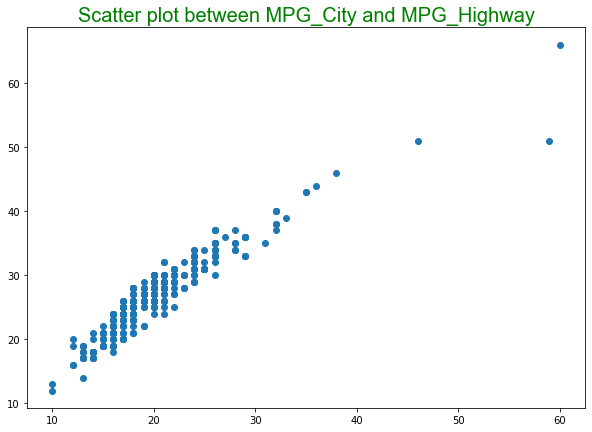

In [31]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(df['MPG_City'], df['MPG_Highway'])
f={'family':'Arial','size':20,"color":'g'}
plt.title('Scatter plot between MPG_City and MPG_Highway',fontdict=f)
plt.show